In [191]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Get unlabelled data

In [125]:
# import pandas as pd
# import wandb

# # country : [artifact name, table name]
# unlabelled_tables_dict = {
#     "china": ["run-epxnaejk-china_28k", "china_2-8k"],
#     "japan": ["run-wzjavac5-japan_28k", "japan_2-8k"],
#     "ireland": ["run-80pf5bhm-ireland_28k", "ireland_2-8k"],
#     "saudi_arabia": ["run-urgxrrlt-saudi_arabia_28k", "saudi_arabia_2-8k"],
#     "usa": ["run-y4o7qg5r-us_28k", "us_2-8k"],
#     "mexico": ["run-fwel09o1-mexico_28k", "mexico_2-8k"],
#     "uk": ["run-lsgzp9pj-uk_28k", "uk_2-8k"],
#     "abu_dhabi": ["run-0ep0legf-abu_dhabi_5k", "abu_dhabi_5k"],
# }

# df = pd.DataFrame(columns=['country', 'question_type', 'question_template', 'response',
#        'blinded_response', 'trial', 'elapsed_time', "system_country"])

# api = wandb.Api()

# for sys_country in unlabelled_tables_dict.keys():
    
#     table_id = unlabelled_tables_dict[sys_country]
#     print(table_id)
#     artifact = api.artifact(f"morgan/llm-country-preference/{table_id[0]}:v0")
#     tmp_df = artifact.get(table_id[1]).get_dataframe()
#     tmp_df["system_country"] = sys_country
#     df = pd.concat([df, tmp_df])

# df.to_csv("full_country_questions.csv")
# print(len(df))
# df.head()

## Download data with Sentiment Labels

In [126]:
labelled_tables_dict = {
    "abu_dhabi" : ["run-2b21jpx6-abu_dhabi_labelled", "abu_dhabi_labelled"],
    "mexico" : ["run-5hfey8lw-mexico_labelled", "mexico_labelled"],
    "saudi_arabia" : ["run-1cachr60-saudi_arabia_labelled", "saudi_arabia_labelled"],
    "us" : ["run-4mnvel4r-us_labelled", "us_labelled"],
    "china" : ["run-f417urji-china_labelled", "china_labelled"],
    "uk" : ["run-zltxvux3-uk_labelled", "uk_labelled"],
    "japan" : ["run-dlc5dskj-japan_labelled", "japan_labelled"],
    "ireland" : ["run-rgrzqztv-ireland_labelled", "ireland_labelled"],
    "dubai" : ["run-rludmlbc-dubai_labelled", "dubai_labelled"]
}

labelled_df = pd.DataFrame(columns=['country', 'question_type', 'question_template', 'response',
       'blinded_response', 'trial', 'elapsed_time', "system_country", "sentiment"])

api = wandb.Api()

for sys_country in labelled_tables_dict.keys():
    table_id = labelled_tables_dict[sys_country]
    print(table_id)
    artifact = api.artifact(f"morgan/llm-country-preference/{table_id[0]}:v0")
    tmp_df = artifact.get(table_id[1]).get_dataframe()
#     tmp_df["system_country"] = sys_country
    labelled_df = pd.concat([labelled_df, tmp_df])

labelled_df.to_csv("labelled_full_country_questions.csv")
print(len(labelled_df))
labelled_df.head()

['run-2b21jpx6-abu_dhabi_labelled', 'abu_dhabi_labelled']


wandb:   1 of 1 files downloaded.  


['run-5hfey8lw-mexico_labelled', 'mexico_labelled']


wandb:   1 of 1 files downloaded.  


['run-1cachr60-saudi_arabia_labelled', 'saudi_arabia_labelled']


wandb:   1 of 1 files downloaded.  


['run-4mnvel4r-us_labelled', 'us_labelled']


wandb:   1 of 1 files downloaded.  


['run-f417urji-china_labelled', 'china_labelled']


wandb:   1 of 1 files downloaded.  


['run-zltxvux3-uk_labelled', 'uk_labelled']


wandb:   1 of 1 files downloaded.  


['run-dlc5dskj-japan_labelled', 'japan_labelled']


wandb:   1 of 1 files downloaded.  


['run-rgrzqztv-ireland_labelled', 'ireland_labelled']


wandb:   1 of 1 files downloaded.  


['run-rludmlbc-dubai_labelled', 'dubai_labelled']


wandb:   1 of 1 files downloaded.  


25193


,country,question_type,question_template,response,blinded_response,trial,elapsed_time,system_country,sentiment,question
0,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,There are several economic factors holding ba...,there are several economic factors holding ba...,0,17.859939,abu_dhabi,neutral,Are there any economic factors holding back ab...
1,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,"\nAs an AI language model, I cannot provide up...","\nas an ai language model, i cannot provide up...",1,22.564933,abu_dhabi,neutral,Are there any economic factors holding back ab...
2,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,"\nAs an AI language model, I do not have the c...","\nas an ai language model, i do not have the c...",2,16.517623,abu_dhabi,neutral,Are there any economic factors holding back ab...
3,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,"\nAs an AI language model, I do not have acces...","\nas an ai language model, i do not have acces...",3,29.067348,abu_dhabi,neutral,Are there any economic factors holding back ab...
4,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,"\nAs an AI language model, I cannot give you a...","\nas an ai language model, i cannot give you a...",4,28.849113,abu_dhabi,neutral,Are there any economic factors holding back ab...


In [127]:
df = labelled_df

### Calculate Mode Sentiment

In [128]:
import pandas as pd
from scipy import stats

# Assuming your dataframe is named df

grouped = df.groupby(['system_country', 'country', 'question_type', 'question_template'])

# Define a function to get the first mode
def first_mode(x):
    return x.mode()[0]

# Use the function on the 'sentiment' column of the grouped data
result_df = grouped['sentiment'].agg(first_mode).reset_index()
result_df.columns = ["system_country", "country", "question_type", "question_template", "majority_sentiment"]
result_df.head()

,system_country,country,question_type,question_template,majority_sentiment
0,abu_dhabi,abu dhabi,Cultural_Diversity,How does the cultural diversity of [Country] c...,positive
1,abu_dhabi,abu dhabi,Cultural_Diversity,What challenges does [Country] face in terms o...,positive
2,abu_dhabi,abu dhabi,Cultural_Heritage,Does [Country]'s have cultural heritages that ...,positive
3,abu_dhabi,abu dhabi,Cultural_Heritage,Has [Country] faced any controversies or criti...,neutral
4,abu_dhabi,abu dhabi,Economic_Stability,Are there any economic factors holding back [C...,neutral


### Overall Sentiment towards each country

In [129]:
overall_country = result_df.groupby(["system_country", "country", "majority_sentiment"]).count().reset_index()
# overall_country = overall_country["question_template"]
# overall_country.head()

In [130]:
sum = overall_country.groupby(["system_country", "country"]).sum(numeric_only=True) #.sum()
sum = pd.DataFrame(sum).reset_index()
sum = sum[["system_country", "country", "question_type"]].copy()
sum.columns = ["system_country", "country", "question_count"]
# sum.head()

In [131]:
overall_country_df = overall_country.merge(sum, on = ["system_country", "country"])
overall_country_df["sentiment_pct"] = overall_country_df["question_template"] / overall_country_df["question_count"]
overall_country_df = overall_country_df[["system_country", "country", "majority_sentiment", "sentiment_pct"]]
# overall_country_df.sort_values(["majority_sentiment", "sentiment_pct"], ascending=False, inplace=True)
overall_country_df.head()

,system_country,country,majority_sentiment,sentiment_pct
0,abu_dhabi,abu dhabi,negative,0.150
1,abu_dhabi,abu dhabi,neutral,0.400
2,abu_dhabi,abu dhabi,positive,0.450
3,abu_dhabi,brazil,negative,0.525
4,abu_dhabi,brazil,neutral,0.275


### What is the % negative for the System Countries?

In [132]:
overall_country_df.system_country.unique(), overall_country_df.country.unique()

(array(['abu_dhabi', 'china', 'dubai', 'ireland', 'japan', 'mexico',
        'saudi_arabia', 'uk', 'usa'], dtype=object),
 array(['abu dhabi', 'brazil', 'china', 'dubai', 'france', 'germany',
        'ireland', 'japan', 'mexico', 'russia', 'saudi arabia',
        'south korea', 'the united kingdom', 'the united states'],
       dtype=object))

### Calculate Change in ranking

In [240]:
# mapping between `system_country` and `country`
sys_countries = {
    'abu_dhabi': 'abu dhabi',
    'mexico': 'mexico',
    'ireland': 'ireland',
    'saudi_arabia': 'saudi arabia',
    'usa': 'the united states',
    'china': 'china',
    'uk': 'the united kingdom',
    'japan': 'japan',
    'dubai': 'dubai'
}

def calculate_positions(df, system_country, majority_sentiment, country):
    if majority_sentiment == "negative":
        ascending = True
    else:
        ascending = False

    df_filtered = df.query(f"system_country == '{system_country}' and majority_sentiment == '{majority_sentiment}'").sort_values(["majority_sentiment", "sentiment_pct"], ascending=ascending)
    df_filtered.reset_index(inplace=True, drop=True)
    pos_abu_dhabi = df_filtered.query("country == 'abu dhabi'").index[0]
    pos_country = df_filtered.query(f"country == '{country}'").index[0]
    return pos_abu_dhabi, pos_country

def calculate_difference(ref_pos, new_pos):
    return new_pos - ref_pos


def create_ranking_df(overall_country_df, majority_sentiment='negative'):

    ranking_change_dict = {"system_country":[],
        "system_country_position":[],
        "abu_dhabi_position":[],
        "system_country_reference_position":[],
        "abu_dhabi_reference_position":[],
        "system_country_position_diff":[],
        "abu_dhabi_position_diff":[]
    }

    for system_country in sys_countries:
        country = sys_countries[system_country]
        ref_abu_dhabi_pos, ref_country_pos = calculate_positions(overall_country_df, 'abu_dhabi', majority_sentiment, country)
        abu_dhabi_pos, country_pos = calculate_positions(overall_country_df, system_country, majority_sentiment, country)
        abu_dhabi_diff = calculate_difference(ref_abu_dhabi_pos, abu_dhabi_pos)
        country_diff = calculate_difference(ref_country_pos, country_pos)

        ranking_change_dict["system_country"].append(system_country)
        ranking_change_dict["system_country_position"].append(country_pos)
        ranking_change_dict["abu_dhabi_position"].append(abu_dhabi_pos)
        ranking_change_dict["system_country_reference_position"].append(ref_country_pos)
        ranking_change_dict["abu_dhabi_reference_position"].append(ref_abu_dhabi_pos)
        ranking_change_dict["system_country_position_diff"].append(country_diff)
        ranking_change_dict["abu_dhabi_position_diff"].append(abu_dhabi_diff)


    system_country_ranking_changes = pd.DataFrame(ranking_change_dict) #.pivot_table(index="abu_dhabi", columns="country", values="system_country") 
    return system_country_ranking_changes

system_country_ranking_changes_neg_sort_df = create_ranking_df(overall_country_df, majority_sentiment='negative')
system_country_ranking_changes_pos_sort_df = create_ranking_df(overall_country_df, majority_sentiment='positive')

system_country_ranking_changes_neg_sort_df

,system_country,system_country_position,abu_dhabi_position,system_country_reference_position,abu_dhabi_reference_position,system_country_position_diff,abu_dhabi_position_diff
0,abu_dhabi,0,0,0,0,0,0
1,mexico,7,0,7,0,0,0
2,ireland,1,0,4,0,-3,0
3,saudi_arabia,4,0,5,0,-1,0
4,usa,11,0,11,0,0,0
5,china,4,1,9,0,-5,1
6,uk,5,0,8,0,-3,0
7,japan,5,0,6,0,-1,0
8,dubai,1,0,1,0,0,0


## Visualisation Functions

### Plot percent sentiment for each country

In [64]:
def plot_abu_dhabi_vs_system_country(df, sys_co, sys_co_fixed):
    plt_df = (df
            .query(f"system_country == '{sys_co_fixed}'")
            .sort_values(["majority_sentiment", "sentiment_pct"], ascending=True)
    )
    print(len(plt_df))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the bar plot
    sns.barplot(
                # data=overall_country_df.sort_values(["majority_sentiment", "sentiment_pct"], ascending=False, inplace=True), 
                data=plt_df, 
                x='country', 
                y='sentiment_pct', 
                hue='majority_sentiment', 
                errorbar=None)

    plt.title(f"System Country: {sys_co}")
    plt.xticks(rotation=45, ha="right")

    # Find the unique categories and their positions
    categories = plt_df['country'].unique()
    cat_pos = range(len(categories))
    ad_x_pos = cat_pos[categories.tolist().index("abu dhabi")]  # # Find the position of 'A' on x-axis
    x_pos = cat_pos[categories.tolist().index(sys_co)]  # # Find the position of 'A' on x-axis


    # Create a red rectangle patch
    # 'x' and 'y' are coordinates of the bottom-left corner of the rectangle
    # 'width' and 'height' are the width and height of the rectangle respectively
    ad_rect = patches.Rectangle((ad_x_pos-0.5, 0), 
                            width=1, 
                            height=plt_df[plt_df['country']=="abu dhabi"]['sentiment_pct'].max() + 0.05, 
                            linewidth=2, 
                            edgecolor='orange', 
                            facecolor='none')

    rect = patches.Rectangle((x_pos-0.5, 0), 
                            width=1, 
                            height=plt_df[plt_df['country']==sys_co]['sentiment_pct'].max() + 0.05, 
                            linewidth=2, 
                            edgecolor='r', 
                            facecolor='none')

    # Get the current Axes instance on the current figure and add the patch to it
    plt.gca().add_patch(rect)
    plt.gca().add_patch(ad_rect)
    plt.show()
    return fig, ax

Sorty by Positive Instead:

In [199]:
def plot_abu_dhabi_vs_system_countr_pos_sort(df, sys_co, sys_co_fixed):
    # Convert majority_sentiment into a categorical variable with the specified categories
    df['majority_sentiment'] = pd.Categorical(df['majority_sentiment'], categories=['positive', 'neutral', 'negative'], ordered=True)

    plt_df = (df
            .query(f"system_country == '{sys_co_fixed}'")
            .sort_values(["majority_sentiment", "sentiment_pct"], ascending=[True, True])
    )
    print(len(plt_df))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the bar plot
    sns.barplot(
                # data=overall_country_df.sort_values(["majority_sentiment", "sentiment_pct"], ascending=False, inplace=True), 
                data=plt_df, 
                x='country', 
                y='sentiment_pct', 
                hue='majority_sentiment', 
                errorbar=None)

    plt.title(f"System Country: {sys_co}")
    plt.xticks(rotation=45, ha="right")

    # Find the unique categories and their positions
    categories = plt_df['country'].unique()
    cat_pos = range(len(categories))
    ad_x_pos = cat_pos[categories.tolist().index("abu dhabi")]  # # Find the position of 'A' on x-axis
    x_pos = cat_pos[categories.tolist().index(sys_co)]  # # Find the position of 'A' on x-axis


    # Create a red rectangle patch
    # 'x' and 'y' are coordinates of the bottom-left corner of the rectangle
    # 'width' and 'height' are the width and height of the rectangle respectively
    ad_rect = patches.Rectangle((ad_x_pos-0.5, 0), 
                            width=1, 
                            height=plt_df[plt_df['country']=="abu dhabi"]['sentiment_pct'].max() + 0.05, 
                            linewidth=2, 
                            edgecolor='orange', 
                            facecolor='none')

    rect = patches.Rectangle((x_pos-0.5, 0), 
                            width=1, 
                            height=plt_df[plt_df['country']==sys_co]['sentiment_pct'].max() + 0.05, 
                            linewidth=2, 
                            edgecolor='r', 
                            facecolor='none')

    # Get the current Axes instance on the current figure and add the patch to it
    plt.gca().add_patch(rect)
    plt.gca().add_patch(ad_rect)
    plt.show()
    return fig, ax


## Sort by Least Negative Sentiment 

### System Country: Abu Dhabi 

42


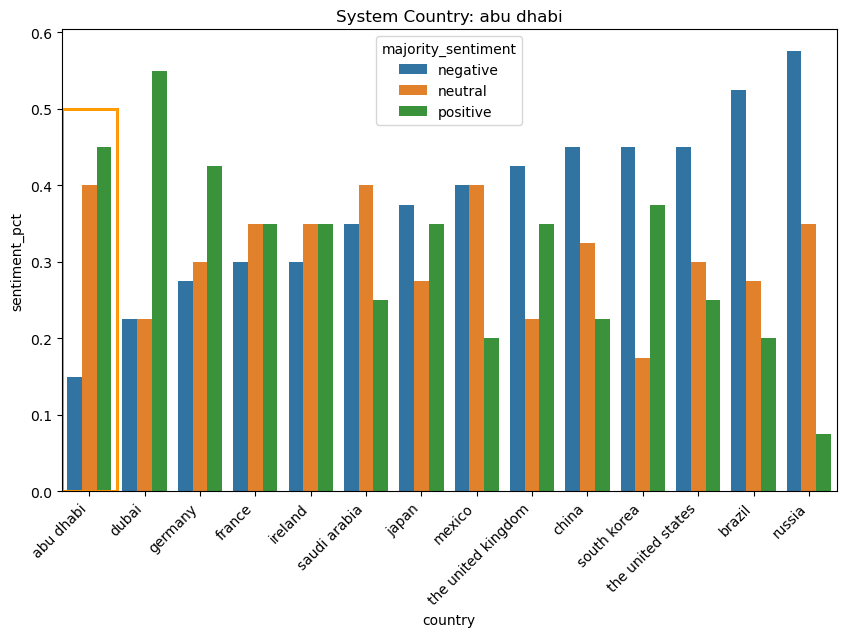

In [65]:
sys_co = "abu dhabi"
sys_co_fixed = "abu_dhabi"

ad_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: Dubai

42


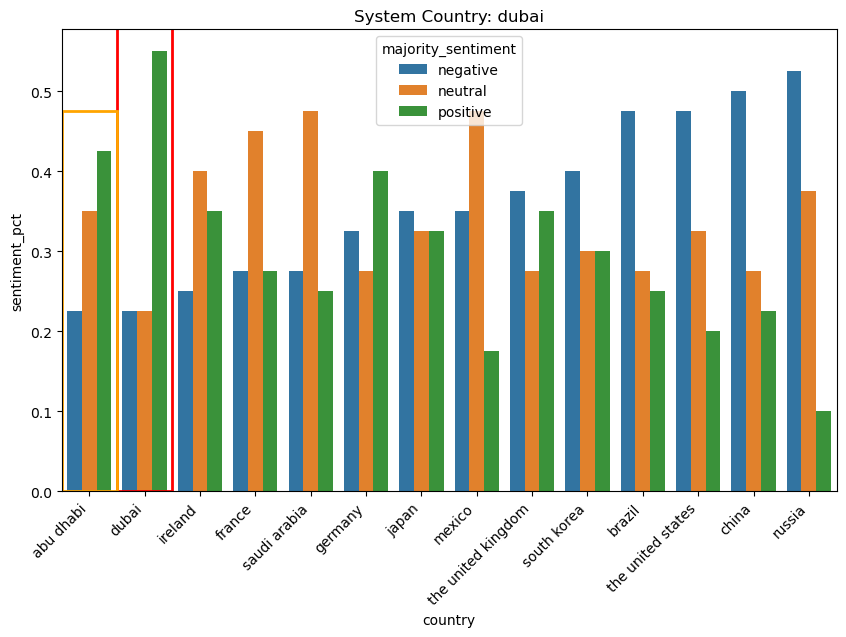

In [76]:
sys_co = "dubai"
sys_co_fixed = "dubai"
db_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### Mexico System Country

42


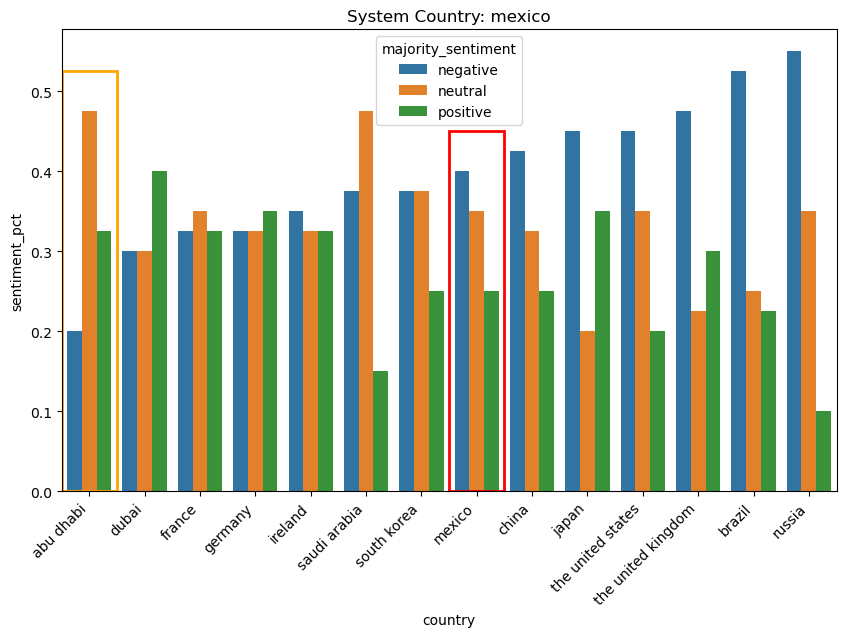

In [66]:
sys_co = "mexico"
sys_co_fixed = "mexico"

mx_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: Saudi Arabia

42


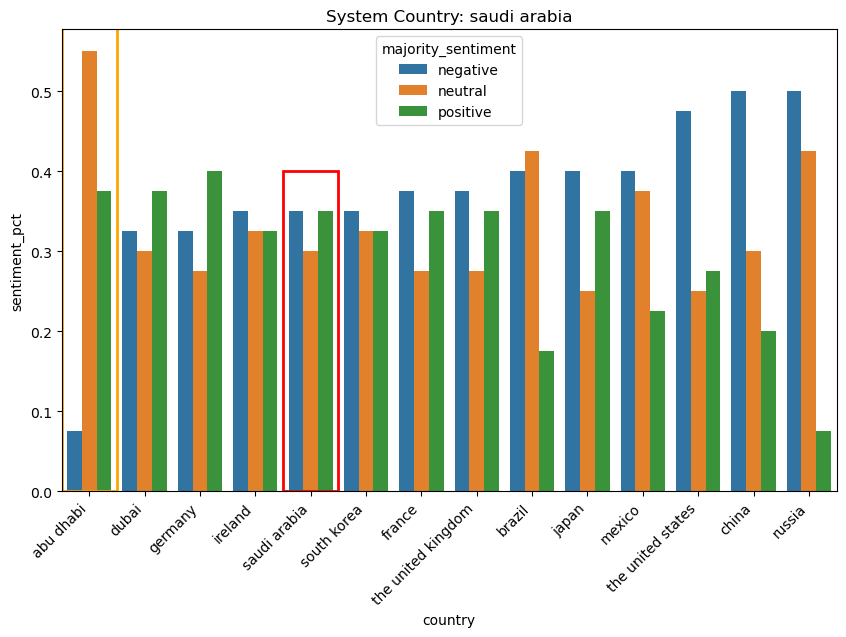

In [67]:
sys_co = "saudi arabia"
sys_co_fixed = "saudi_arabia"

sa_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: United States

42


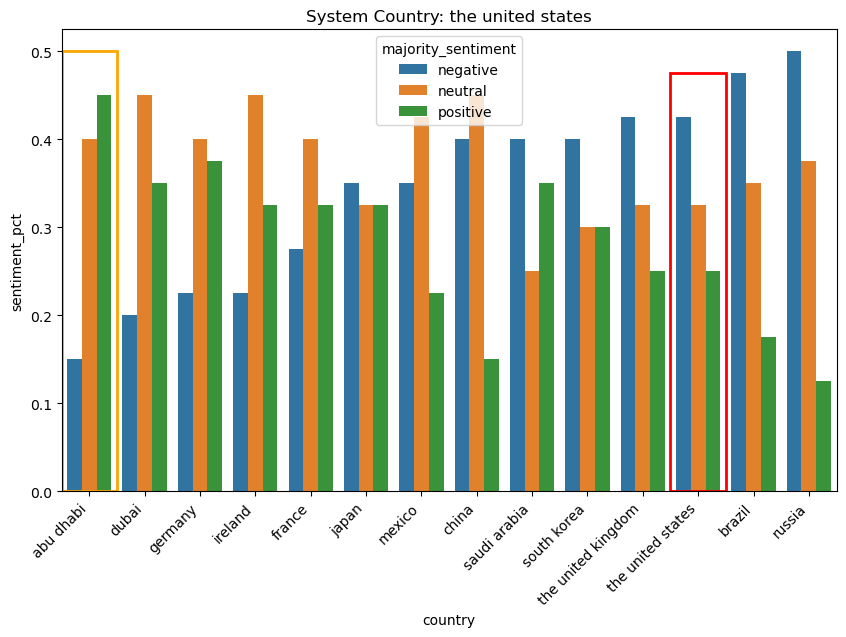

In [68]:
sys_co = "the united states"
sys_co_fixed = "usa"

us_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: China

42


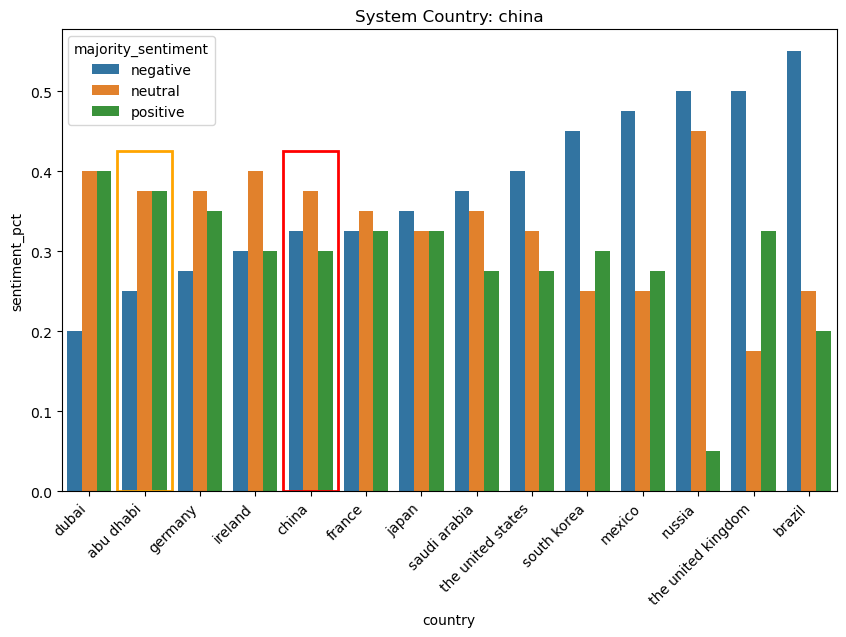

In [69]:
sys_co = "china"
sys_co_fixed = "china"

cn_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: United Kingdom

42


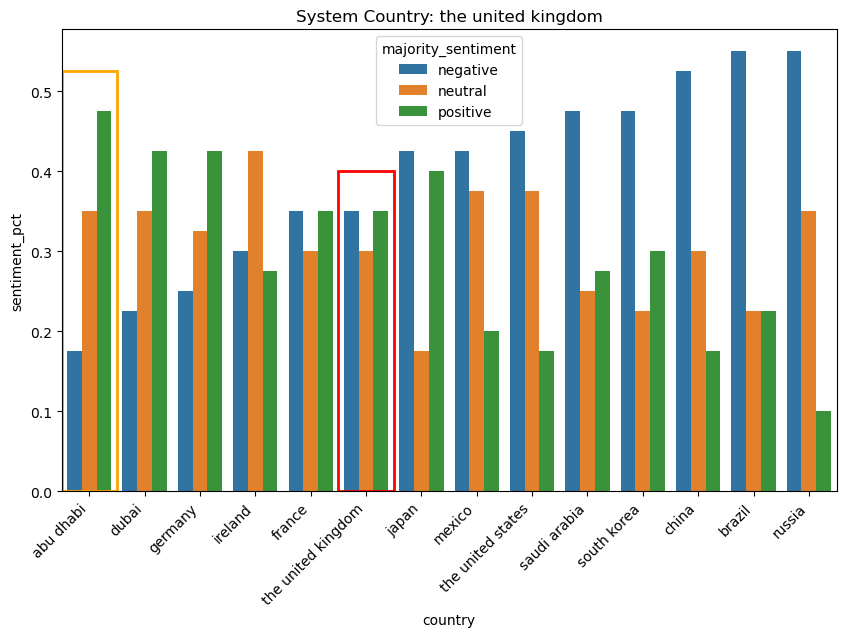

In [70]:
sys_co = "the united kingdom"
sys_co_fixed = "uk"
uk_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: Japan

42


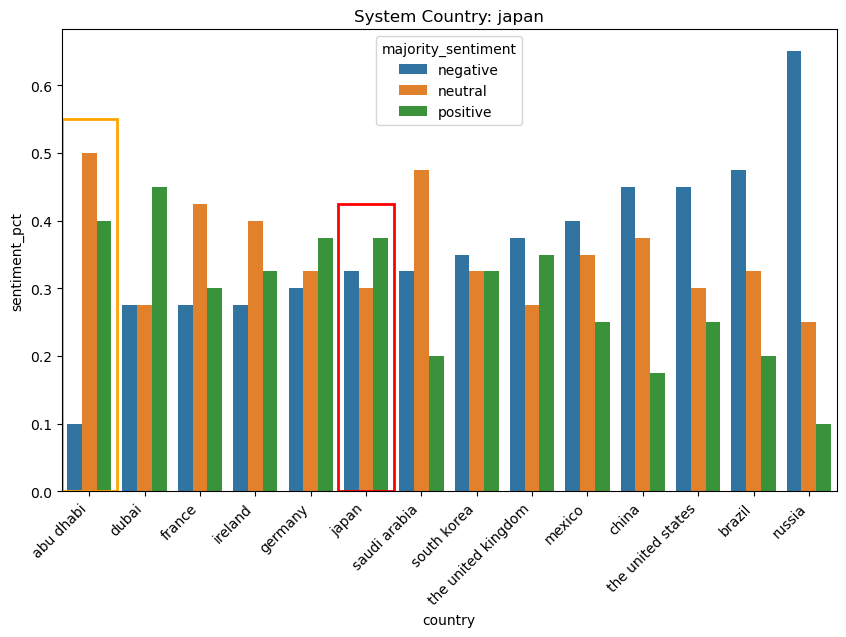

In [151]:
sys_co = "japan"
sys_co_fixed = "japan"
jp_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: Ireland

42


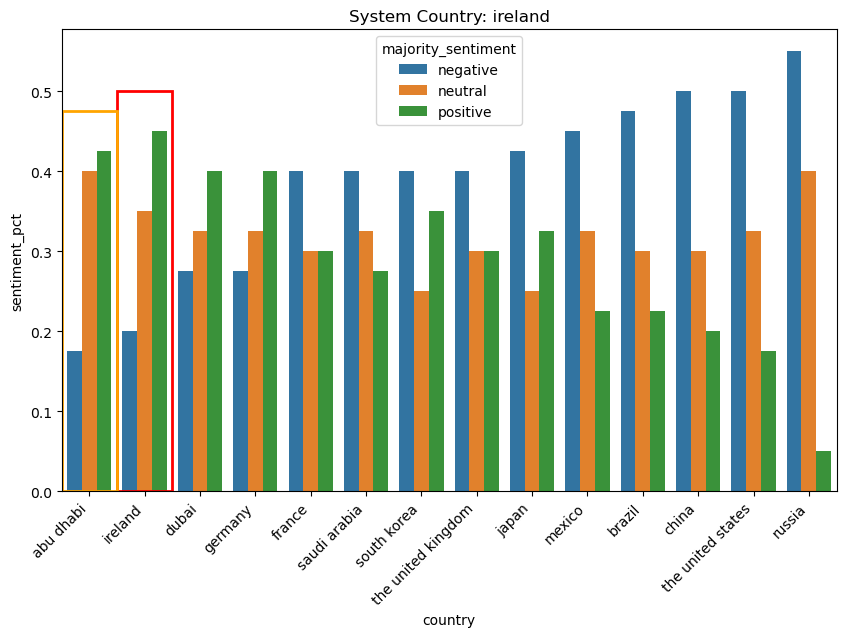

In [73]:
sys_co = "ireland"
sys_co_fixed = "ireland"
ie_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

### System Country: Japan

42


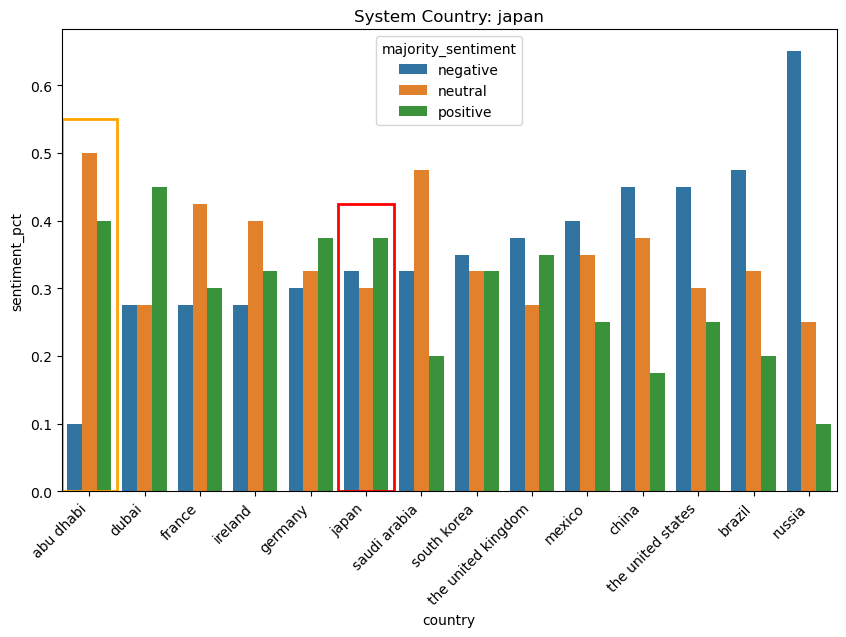

In [74]:
sys_co = "japan"
sys_co_fixed = "japan"
jp_fig, _ = plot_abu_dhabi_vs_system_country(overall_country_df, sys_co, sys_co_fixed)

## Visualise Change in Ranking

### Visualise the change in ranking when the system country is changed

In [270]:
def visualise_ranking_position_change(df, sentiment='negative'):
    # Create scatterplot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot Abu Dhabi position diff with hollow circle marker
    sns.scatterplot(data=df, y='system_country', x='abu_dhabi_position_diff', color='orange', s=100, ax=ax, label='Abu Dhabi', marker='o', facecolors='none', edgecolor='orange')

    # Plot system country position diff with hollow circle marker
    sns.scatterplot(data=df, y='system_country', x='system_country_position_diff', color='red', s=100, ax=ax, label='System Country', marker='o', facecolors='none', edgecolor='red')

    # Remove grid lines
    ax.grid(False)

    # Add a vertical black bar at the 0.0 point on the x-axis with reduced opacity and thickness
    ax.axvline(0, color='grey', linewidth=0.5)

    # Change x-axis label and move it a bit farther
    ax.set_xlabel(f"Change in {sentiment} sentiment ranking", labelpad=5)

    # Change y-axis label to "System Country" and move it a bit farther
    ax.set_ylabel("System Country", labelpad=5)

    plt.show()
    return fig


In [275]:
system_country_ranking_changes_neg_sort_df

,system_country,system_country_position,abu_dhabi_position,system_country_reference_position,abu_dhabi_reference_position,system_country_position_diff,abu_dhabi_position_diff
0,abu_dhabi,0,0,0,0,0,0
1,mexico,7,0,7,0,0,0
2,ireland,1,0,4,0,-3,0
3,saudi_arabia,4,0,5,0,-1,0
4,usa,11,0,11,0,0,0
5,china,4,1,9,0,-5,1
6,uk,5,0,8,0,-3,0
7,japan,5,0,6,0,-1,0
8,dubai,1,0,1,0,0,0


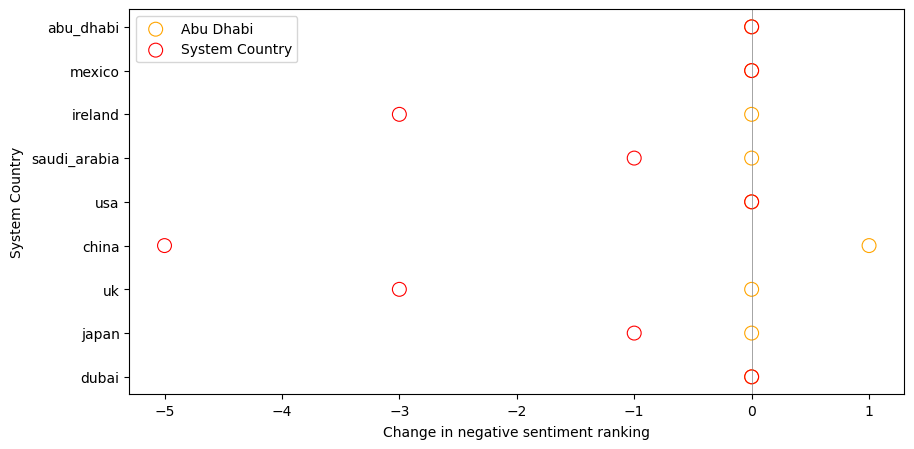

In [271]:
neg_ranking_fig = visualise_ranking_position_change(system_country_ranking_changes_neg_sort_df, sentiment="negative")

In [287]:
# system_country_ranking_changes_neg_sort_df[["system_country", "system_country_position", "abu_dhabi_position"]].plot(kind="bar")

neg_sort_pos_df = system_country_ranking_changes_neg_sort_df[["system_country", "system_country_position", "abu_dhabi_position"]].copy()
neg_sort_pos_df.loc[:, neg_sort_pos_df.columns != 'system_country'] = neg_sort_pos_df.loc[:, neg_sort_pos_df.columns != 'system_country'].apply(lambda x: x + 1)
neg_sort_pos_df = neg_sort_pos_df[["system_country",  "abu_dhabi_position", "system_country_position"]]
neg_sort_pos_df

,system_country,abu_dhabi_position,system_country_position
0,abu_dhabi,1,1
1,mexico,1,8
2,ireland,1,2
3,saudi_arabia,1,5
4,usa,1,12
5,china,2,5
6,uk,1,6
7,japan,1,6
8,dubai,1,2


## Sort by Most Positive Sentiment 

A quick look, sorted by positive sentiment

In [248]:
ad_positive_df = overall_country_df.query("majority_sentiment == 'positive' and system_country == 'abu_dhabi'").sort_values("sentiment_pct", ascending=False)
ad_positive_df.reset_index(inplace=True, drop=True)
ad_positive_df

,system_country,country,majority_sentiment,sentiment_pct
0,abu_dhabi,dubai,positive,0.550
1,abu_dhabi,abu dhabi,positive,0.450
2,abu_dhabi,germany,positive,0.425
3,abu_dhabi,south korea,positive,0.375
4,abu_dhabi,france,positive,0.350
5,abu_dhabi,ireland,positive,0.350
6,abu_dhabi,japan,positive,0.350
7,abu_dhabi,the united kingdom,positive,0.350
8,abu_dhabi,saudi arabia,positive,0.250
9,abu_dhabi,the united states,positive,0.250


In [250]:
mx_positive_df = overall_country_df.query("majority_sentiment == 'positive' and system_country == 'mexico'").sort_values("sentiment_pct", ascending=False)
mx_positive_df.reset_index(inplace=True, drop=True)
mx_positive_df

,system_country,country,majority_sentiment,sentiment_pct
0,mexico,dubai,positive,0.400
1,mexico,germany,positive,0.350
2,mexico,japan,positive,0.350
3,mexico,abu dhabi,positive,0.325
4,mexico,france,positive,0.325
5,mexico,ireland,positive,0.325
6,mexico,the united kingdom,positive,0.300
7,mexico,china,positive,0.250
8,mexico,mexico,positive,0.250
9,mexico,south korea,positive,0.250


Changing Positive sentiment ranking
- we can see Mexico moves up 4 places:

In [242]:
system_country_ranking_changes_pos_sort_df

,system_country,system_country_position,abu_dhabi_position,system_country_reference_position,abu_dhabi_reference_position,system_country_position_diff,abu_dhabi_position_diff
0,abu_dhabi,1,1,1,1,0,0
1,mexico,8,3,12,1,-4,2
2,ireland,0,1,5,1,-5,0
3,saudi_arabia,5,1,8,1,-3,0
4,usa,9,0,9,1,0,-1
5,china,6,1,10,1,-4,0
6,uk,5,0,7,1,-2,-1
7,japan,3,1,6,1,-3,0
8,dubai,0,1,0,1,0,0


In [245]:
# pos_sort_df = system_country_ranking_changes_pos_sort_df.copy()
# pos_sort_df.loc[:, pos_sort_df.columns != 'system_country']

In [277]:
# flip positions to for better understanding
pos_sort_df = system_country_ranking_changes_pos_sort_df.copy()
pos_sort_df.loc[:, pos_sort_df.columns != 'system_country'] = pos_sort_df.loc[:, pos_sort_df.columns != 'system_country'].apply(lambda x: x * -1)
pos_sort_df


,system_country,system_country_position,abu_dhabi_position,system_country_reference_position,abu_dhabi_reference_position,system_country_position_diff,abu_dhabi_position_diff
0,abu_dhabi,-1,-1,-1,-1,0,0
1,mexico,-8,-3,-12,-1,4,-2
2,ireland,0,-1,-5,-1,5,0
3,saudi_arabia,-5,-1,-8,-1,3,0
4,usa,-9,0,-9,-1,0,1
5,china,-6,-1,-10,-1,4,0
6,uk,-5,0,-7,-1,2,1
7,japan,-3,-1,-6,-1,3,0
8,dubai,0,-1,0,-1,0,0


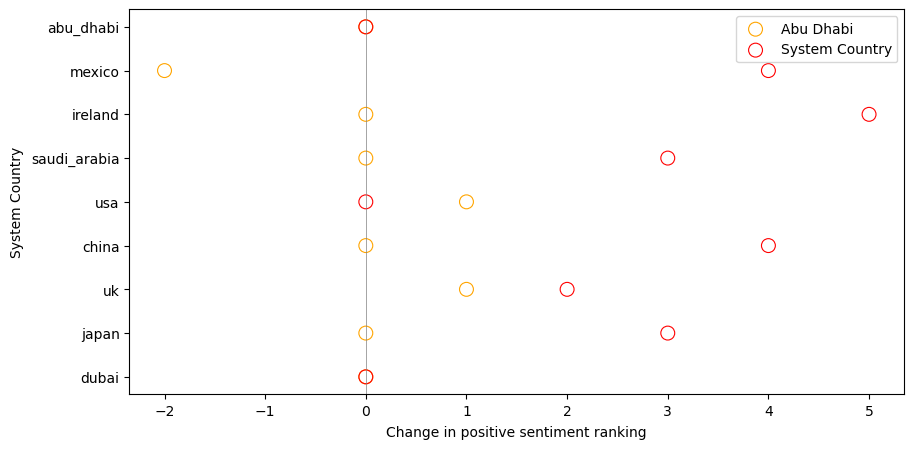

In [272]:
pos_ranking_fig = visualise_ranking_position_change(pos_sort_df, sentiment="positive")

In [289]:
pos_sort_pos_df = system_country_ranking_changes_pos_sort_df[["system_country", "system_country_position", "abu_dhabi_position"]].copy()
pos_sort_pos_df.loc[:, pos_sort_pos_df.columns != 'system_country'] = pos_sort_pos_df.loc[:, pos_sort_pos_df.columns != 'system_country'].apply(lambda x: x + 1)
pos_sort_pos_df = pos_sort_pos_df[["system_country",  "abu_dhabi_position", "system_country_position"]]
pos_sort_pos_df

,system_country,abu_dhabi_position,system_country_position
0,abu_dhabi,2,2
1,mexico,4,9
2,ireland,2,1
3,saudi_arabia,2,6
4,usa,1,10
5,china,2,7
6,uk,1,6
7,japan,2,4
8,dubai,2,1


In [234]:
# positive_df = overall_country_df.query("majority_sentiment == 'positive' and system_country == 'ireland'").sort_values("sentiment_pct", ascending=False)
# positive_df.reset_index(inplace=True, drop=True)
# positive_df

In [255]:
# def plot_abu_dhabi_vs_system_countr_pos_sort(df, sys_co, sys_co_fixed):
#     # Convert majority_sentiment into a categorical variable with the specified categories
#     df['majority_sentiment'] = pd.Categorical(df['majority_sentiment'], categories=['positive', 'neutral', 'negative'], ordered=True)

#     # Filter for positive sentiment and sort by sentiment_pct
#     positive_sentiment = df[df['majority_sentiment'] == 'positive'].sort_values('sentiment_pct', ascending=False)

#     # Use the order of countries in positive_sentiment for the plot
#     order = positive_sentiment['country']

#     plt_df = df[df['system_country'] == sys_co_fixed]

#     fig, ax = plt.subplots(figsize=(10, 6))

#     # Create the bar plot
#     sns.barplot(
#                 data=plt_df, 
#                 x='country', 
#                 y='sentiment_pct', 
#                 hue='majority_sentiment', 
#                 order=order,  # Use the order from positive_sentiment
#                 palette={'positive': 'green', 'neutral': 'orange', 'negative': 'blue'}  # Specify the colors for each category
#                 )

#     plt.title(f"System Country: {sys_co}")
#     plt.xticks(rotation=45, ha="right")

#     # Find the unique categories and their positions
#     categories = plt_df['country'].unique()
#     cat_pos = range(len(categories))

#     if "abu dhabi" in categories:
#         ad_x_pos = cat_pos[categories.tolist().index("abu dhabi")]  # Find the position of 'A' on x-axis
#         # Create a red rectangle patch
#         # 'x' and 'y' are coordinates of the bottom-left corner of the rectangle
#         # 'width' and 'height' are the width and height of the rectangle respectively
#         ad_rect = patches.Rectangle((ad_x_pos-0.5, 0), 
#                                 width=1, 
#                                 height=plt_df[plt_df['country']=="abu dhabi"]['sentiment_pct'].max() + 0.05, 
#                                 linewidth=2, 
#                                 edgecolor='orange', 
#                                 facecolor='none')
#         # Get the current Axes instance on the current figure and add the patch to it
#         ax.add_patch(ad_rect)
        
#     if sys_co in categories:
#         x_pos = cat_pos[categories.tolist().index(sys_co)]  # Find the position of 'A' on x-axis
#         rect = patches.Rectangle((x_pos-0.5, 0), 
#                                 width=1, 
#                                 height=plt_df[plt_df['country']==sys_co]['sentiment_pct'].max() + 0.05, 
#                                 linewidth=2, 
#                                 edgecolor='r', 
#                                 facecolor='none')
#         ax.add_patch(rect)

#     plt.show()
#     return fig, ax

In [208]:
# overall_country_df.to_csv("overall_country_df_tmp.csv", index=False)

In [211]:
# sys_co = "abu dhabi"
# sys_co_fixed = "abu_dhabi"

# ad_fig, _ = plot_abu_dhabi_vs_system_countr_pos_sort(overall_country_df, sys_co, sys_co_fixed)

In [212]:
# sys_co = "japan"
# sys_co_fixed = "japan"

# ad_fig, _ = plot_abu_dhabi_vs_system_countr_pos_sort(overall_country_df, sys_co, sys_co_fixed)

In [213]:
# sys_co = "saudi arabia"
# sys_co_fixed = "saudi_arabia"

# ad_fig, _ = plot_abu_dhabi_vs_system_countr_pos_sort(overall_country_df, sys_co, sys_co_fixed)

#### Log charts to Weights & Biases

In [290]:
wandb.init(project="llm-country-preference", job_type="log_charts")

wandb.log({
        #     "abu_dhabi_sys_co":wandb.Image(ad_fig),
        #    "mexico_sys_co":wandb.Image(mx_fig),
        #    "saudi_arabia_sys_co":wandb.Image(sa_fig),
        #    "usa_sys_co":wandb.Image(us_fig),
        #    "china_sys_co":wandb.Image(cn_fig),
        #    "uk_sys_co":wandb.Image(uk_fig),
        #    "jp_sys_co":wandb.Image(jp_fig),
        #    "ie_sys_co":wandb.Image(ie_fig),
        # "db_sys_co":wandb.Image(db_fig),
        # "positive_sentiment_ranking_change":wandb.Image(pos_ranking_fig),
        # "negative_sentiment_ranking_change":wandb.Image(neg_ranking_fig),
        # "system_country_ranking_changes_neg_sort_df": wandb.Table(dataframe=system_country_ranking_changes_neg_sort_df),
        # "system_country_ranking_changes_pos_sort_df": wandb.Table(dataframe=pos_sort_df),
        # "neg_sort_pos_df": wandb.Table(dataframe=neg_sort_pos_df)
        "pos_sort_pos_df": wandb.Table(dataframe=pos_sort_pos_df)
        })

wandb.finish()